<a href="https://colab.research.google.com/github/seolibek/Tufts2024/blob/main/tSNE_w_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
cd MyDrive/

/content/drive/MyDrive


In [11]:
ls

'Aryaman-draft- Casey Petersen.docx'
 Aryaman-Kaden-PeerReview.docx
"Aryaman's Peer Review of Yahya.gdoc"
'Aryaman Tepal - Beginning of Semester survey spring 2023.gdoc'
'Aryaman Tepal - Notes on your piece of media and research question (1).gdoc'
'Aryaman Tepal - Notes on your piece of media and research question (2).gdoc'
'Aryaman Tepal - Notes on your piece of media and research question.gdoc'
'AryamanTepal_resume (1).pdf'
'AryamanTepal_resume2 (1).pdf'
 AryamanTepal_resume2.pdf
'AryamanTepal_resume (2).pdf'
'AryamanTepal_resume (3).pdf'
'AryamanTepal_resume (4).pdf'
 AryamanTepal_resume.pdf
'Aryaman Tepal Resume.pdf'
'Aryaman_Tepal Resume.pdf'
'Aryaman Tepal Schedule.png'
'Aryaman Tepal Transcript.pdf'
'Aryaman_Tepal Transcript.pdf'
'Blade Runner 2049 - A Human Touch.docx'
'Chem - Poster Content.gdoc'
 Classroom/
'Colab Notebooks'/
'Copy of Ace the Coding Interview ATCI Guide.gdoc'
'Copy of Lab03: Lists (Questionnaire).gdoc'
'Copy of Lab04: Branching (Questionnaire).gdoc'
'Copy of 

Using Scipy to read in the Hyperspectral image -- seeing results.


In [47]:
import scipy.io
data = scipy.io.loadmat('SalinasA_corrected.mat')
labels_data = scipy.io.loadmat('SalinasA_gt.mat')
salinasA = data['salinasA_corrected']
salinasA_gt = labels_data['salinasA_gt']

In [48]:
n_samples, n_bands, _ = salinasA.shape
X = salinasA.reshape(-1, salinasA.shape[2])

In [49]:
y = salinasA_gt.reshape(-1)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Since X is a 3D Image, use PCA to reduce Dimensionality


In [67]:
# Apply PCA to reduce dimensionality to a manageable level
pca = PCA(n_components=1)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

In [68]:
def tsne_projection_2d(data):
  tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30)
  X_tsne = tsne.fit_transform(data)

  plt.figure(figsize=(10, 8))
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,s=0.1, cmap='Spectral')
  plt.title('t-SNE of SalinasA Dataset with Ground Truth Labels')
  plt.xlabel('t-SNE 1')
  plt.colorbar(label='Spectral classes')
  plt.ylabel('t-SNE 2')
  plt.show()

# def umap_projection_2d(hsi_data):

#   data_reshaped = hsi_data.reshape(-1, hsi_data.shape[2])

#   #setting seed so i dont get a bunch of diff results. not random rn
#   reducer = umap.UMAP(random_state=42)
#   embedding = reducer.fit_transform(data_reshaped)

#   # Visualization
#   plt.figure(figsize=(10, 8))
#   plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral')
#   plt.title('2D UMAP Projection of the Dataset')
#   plt.colorbar(label='Spectral classes')
#   plt.show()

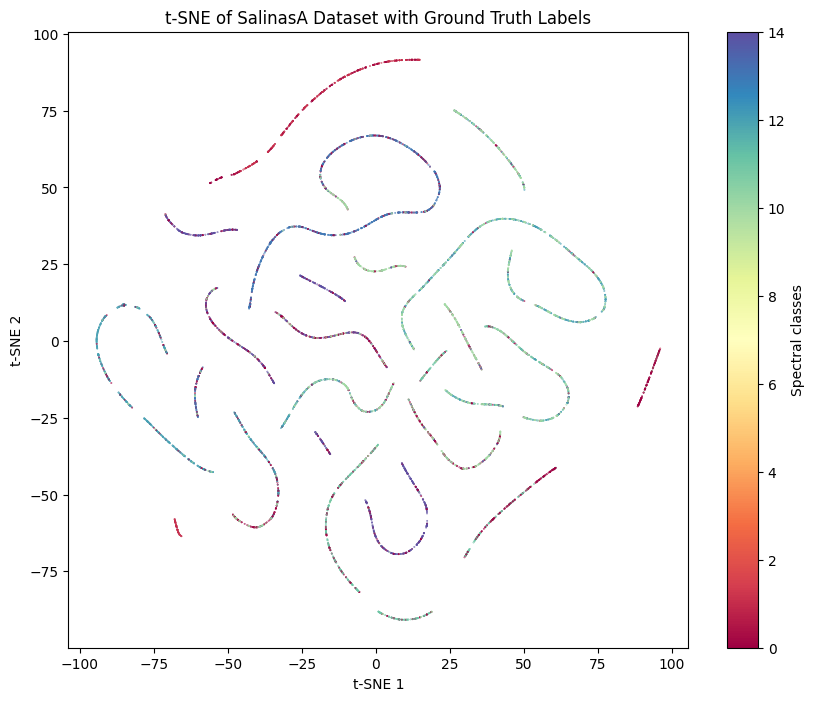

In [69]:
tsne_projection_2d(X_pca)